# LeNet_print


In [2]:
%matplotlib inline
from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
# number 1 to 10 data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

# 每個 MNIST 中的圖片都有一個對應的 label 也就是從 0 到 9 的數值．
# 在這裡每個 label 都是一個 one-hot vectors
# one-hot vector 是指說只有一個維度是 1 其他都是 0
# 例如 label 0 的表示法就是 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
print (type(mnist))
print (mnist.train.num_examples)
print (mnist.validation.num_examples)
print (mnist.test.num_examples)

<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>
55000
5000
10000


# data_shape


In [5]:
print("讓我們看一下 MNIST 訓練還有測試的資料集長得如何")
train_img = mnist.train.images
train_label = mnist.train.labels
test_img = mnist.test.images
test_label = mnist.test.labels
print
print(" train_img 的 type : %s" % (type(train_img)))
print(" train_img 的 dimension : %s" % (train_img.shape,))
print(" train_label 的 type : %s" % (type(train_label)))
print(" train_label 的 dimension : %s" % (train_label.shape,))
print(" test_img 的 type : %s" % (type(test_img)))
print(" test_img 的 dimension : %s" % (test_img.shape,))
print(" test_label 的 type : %s" % (type(test_label)))
print(" test_label 的 dimension : %s" % (test_label.shape,))

讓我們看一下 MNIST 訓練還有測試的資料集長得如何
 train_img 的 type : <class 'numpy.ndarray'>
 train_img 的 dimension : (55000, 784)
 train_label 的 type : <class 'numpy.ndarray'>
 train_label 的 dimension : (55000, 10)
 test_img 的 type : <class 'numpy.ndarray'>
 test_img 的 dimension : (10000, 784)
 test_label 的 type : <class 'numpy.ndarray'>
 test_label 的 dimension : (10000, 10)


# print_pic

In [6]:
def reshape_pic(origin, size, channel, xsnum):
    pic = origin[xsnum] #第num張照片 
    ch = pic.transpose(2,0,1).reshape([channel,-1]) #將照片拉成數個channel
    out = ch.reshape([size*channel,size]) #將第cnum的channel照片拉成28x28
    print("\n*********************************************************************************\n")    
    print ("pic shape:" + str(pic.shape))
    print ("ch shape:" + str(ch.shape))
    print ("out shape:" + str(out.shape))
    print("\n*********************************************************************************\n")
    return out


# print_pic_int

In [7]:
 def print_pic_int(x):
    print("\n*********************************************************************************\n")

    j = 0
    while j < 783 :
        print (str(int(round(x[j+0])))+ ","+ str(int(round(x[j+1])))
        + ","+ str(int(round(x[j+2])))+ ","+ str(int(round(x[j+3])))
        + ","+ str(int(round(x[j+4])))+ ","+ str(int(round(x[j+5])))
        + ","+ str(int(round(x[j+6])))+ ","+ str(int(round(x[j+7])))
        + ","+ str(int(round(x[j+8])))+ ","+ str(int(round(x[j+9])))
        + ","+ str(int(round(x[j+10])))+ ","+ str(int(round(x[j+11])))
        + ","+ str(int(round(x[j+12])))+ ","+ str(int(round(x[j+13])))
        + ","+ str(int(round(x[j+14])))+ ","+ str(int(round(x[j+15])))
        + ","+ str(int(round(x[j+16])))+ ","+ str(int(round(x[j+17])))
        + ","+ str(int(round(x[j+18])))+ ","+ str(int(round(x[j+19])))
        + ","+ str(int(round(x[j+20])))+ ","+ str(int(round(x[j+21])))
        + ","+ str(int(round(x[j+22])))+ ","+ str(int(round(x[j+23])))
        + ","+ str(int(round(x[j+24])))+ ","+ str(int(round(x[j+25])))
        + ","+ str(int(round(x[j+26])))+ ","+ str(int(round(x[j+27]))))

        j += 28    

# print_pic_prec

In [8]:
def print_pic_prec(x , prec):
    print ("type:")
    print (type(x))
    print ("shape:")
    print (x.shape)
    print ("test printing by num:")
    i = 0
    print("\n*********************************************************************************\n")
    while i < 783 :
        print  (str(round(x[i+0], prec))+ ","+ str(round(x[i+1], prec))
        + ","+ str(round(x[i+2], prec))+ ","+ str(round(x[i+3], prec))
        + ","+ str(round(x[i+4], prec))+ ","+ str(round(x[i+5], prec))
        + ","+ str(round(x[i+6], prec))+ ","+ str(round(x[i+7], prec))
        + ","+ str(round(x[i+8], prec))+ ","+ str(round(x[i+9], prec))
        + ","+ str(round(x[i+10], prec))+ ","+ str(round(x[i+11], prec))
        + ","+ str(round(x[i+12], prec))+ ","+ str(round(x[i+13], prec))
        + ","+ str(round(x[i+14], prec))+ ","+ str(round(x[i+15], prec))
        + ","+ str(round(x[i+16], prec))+ ","+ str(round(x[i+17], prec))
        + ","+ str(round(x[i+18], prec))+ ","+ str(round(x[i+19], prec))
        + ","+ str(round(x[i+20], prec))+ ","+ str(round(x[i+21], prec))
        + ","+ str(round(x[i+22], prec))+ ","+ str(round(x[i+23], prec))
        + ","+ str(round(x[i+24], prec))+ ","+ str(round(x[i+25], prec))
        + ","+ str(round(x[i+26], prec))+ ","+ str(round(x[i+27], prec)))

        i+=28

    print("\n*********************************************************************************\n")

    print ("test printing by pic:")

    curr_img   = np.reshape(x, (28, 28)) # 28 by 28 matrix 
    curr_label = np.argmax(trainlabel[testdata, :] ) # Label
    plt.matshow(curr_img, cmap=plt.get_cmap('gray'))
    plt.title("" + str(testdata + 1) + "th Training Data " 
    + "Label is " + str(curr_label)+"\n")

In [9]:
trainimg = mnist.train.images
trainlabel = mnist.train.labels
nsample = 1
randidx = np.random.randint(trainimg.shape[0], size=nsample)

#testdata = 54999 #data no. 0- 54999 total 55000
#x = trainimg[testdata]

#prec = 1 #precision
#print_pic(x,1)


# definition

In [10]:
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# CNN training

In [11]:

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 784])/255.   # 28x28
ys = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# print(x_image.shape)  # [n_samples, 28,28,1]

## conv1 layer ##
W_conv1 = weight_variable([5,5,1,6]) # patch 5x5, in size 1, out size 32
b_conv1 = bias_variable([6])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 28x28x32
h_pool1 = max_pool_2x2(h_conv1)                                         # output size 14x14x32

## conv2 layer ##
W_conv2 = weight_variable([5,5, 6, 16]) # patch 5x5, in size 32, out size 64
b_conv2 = bias_variable([16])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 14x14x64
h_pool2 = max_pool_2x2(h_conv2)                                         # output size 7x7x64

## fc1 layer ##
W_fc1 = weight_variable([7*7*16, 120])
b_fc1 = bias_variable([120])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*16])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([120, 10])
b_fc2 = bias_variable([10])
prediction = tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)


# the error between prediction and real data
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys * tf.log(prediction),
                                              reduction_indices=[1]))       # loss
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

sess = tf.Session()
# important step
# tf.initialize_all_variables() no long valid from
# 2017-03-02 if using tensorflow >= 0.12
if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
    init = tf.initialize_all_variables()
else:
    init = tf.global_variables_initializer()
sess.run(init)
for i in range(1):
    batch_xs, batch_ys = mnist.train.next_batch(100)

# printing

x_image shape : (?, 28, 28, 1)

*********************************************************************************

pic shape:(28, 28, 1)
ch shape:(1, 784)
out shape:(28, 28)

*********************************************************************************



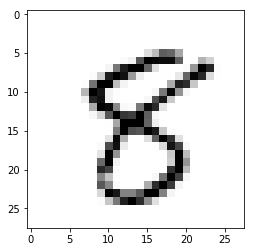

In [12]:


    #sess.run(train_step, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    #if i % 50 == 0:
       # print(compute_accuracy(mnist.test.images[:1000], mnist.test.labels[:1000]))
print ("x_image shape : " + str(x_image.shape))
px1 = sess.run(x_image, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
plt.imshow(reshape_pic(px1,28,1,0), cmap='Greys')
        

conv1 shape : (?, 28, 28, 6)

*********************************************************************************

pic shape:(28, 28, 6)
ch shape:(6, 784)
out shape:(168, 28)

*********************************************************************************



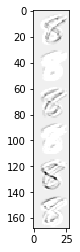

In [13]:
    print ("conv1 shape : " + str(h_conv1.shape))
    pC1 = sess.run(h_conv1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC1,28,6,0), cmap='Greys')

    # print("\n*********************************************************************************\n")
    # print ("reshape pic shape:" + str((reshape_pic(pC1,28,6,0)).shape))
    # print ("content:\n" + str(reshape_pic(pC1,28,6,0)))
    # print("\n*********************************************************************************\n")

pool1 shape : (?, 14, 14, 6)

*********************************************************************************

pic shape:(14, 14, 6)
ch shape:(6, 196)
out shape:(84, 14)

*********************************************************************************



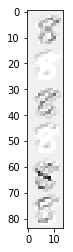

In [14]:
    print ("pool1 shape : " + str(h_pool1.shape))
    pH1 = sess.run(h_pool1, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH1,14,6,0), cmap='Greys')

conv2 shape : (?, 14, 14, 16)

*********************************************************************************

pic shape:(14, 14, 16)
ch shape:(16, 196)
out shape:(224, 14)

*********************************************************************************



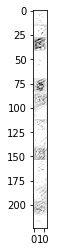

In [15]:
    print ("conv2 shape : " + str(h_conv2.shape))
    pC2 = sess.run(h_conv2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pC2,14,16,0), cmap='Greys')

pool2 shape : (?, 7, 7, 16)

*********************************************************************************

pic shape:(7, 7, 16)
ch shape:(16, 49)
out shape:(112, 7)

*********************************************************************************



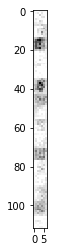

In [16]:
    print ("pool2 shape : " + str(h_pool2.shape))
    pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
    plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')

In [17]:
    print ("fc1 shape : " + str(h_fc1[0].shape))
    print (sess.run(h_fc1[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))

fc1 shape : (120,)
[ 0.          0.16961333  0.60332823  0.97612309  0.38786662  0.07486876
  0.          0.18171194  0.33016786  0.35612121  0.          0.27480125
  0.          0.          0.          0.          0.          0.23580912
  0.18897748  0.62736619  0.24120495  0.36848184  0.44934559  0.16292594
  0.          0.          0.          0.30696118  0.82779408  0.          0.
  0.27073339  0.67253143  0.          0.          0.28131813  0.37105989
  0.          0.63027918  0.          0.6001963   0.21392712  0.          0.
  0.42490125  0.          0.          0.          0.          0.
  0.47120109  0.66792369  0.          0.          0.29080689  0.          0.
  0.          0.          0.6248486   0.22819287  0.06147362  0.
  0.24267721  0.74243408  0.28942922  0.67060852  0.78126854  0.78337491
  0.          0.43048355  0.          0.66922522  1.057688    0.
  0.58929205  0.2923598   0.03781009  0.15247419  1.03506649  0.
  0.06705713  0.16031331  0.34018615  0.2912806   0.

In [18]:
    print ("prediction shape : " + str(prediction[0].shape))
    print (sess.run(prediction[0], feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5}))
#     pH2 = sess.run(h_pool2, feed_dict={xs: batch_xs, ys: batch_ys, keep_prob: 0.5})
#     plt.imshow(reshape_pic(pH2,7,16,0), cmap='Greys')

prediction shape : (10,)
[ 0.18773021  0.07964797  0.05780942  0.07197135  0.05369798  0.04744849
  0.17465995  0.11879852  0.12155256  0.08668351]
